<a href="https://colab.research.google.com/github/Bushra1423/MedDiagnose/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pickle
import os
import numpy as np
import cv2
%matplotlib inline

In [ ]:
# Define the labels and image size
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir, labels, img_size=(150, 150)):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # 0 for PNEUMONIA, 1 for NORMAL
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, img_size)
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)  # Specify dtype=object for arrays containing different shapes


In [ ]:
# Load data
train_data = get_training_data('/content/drive/MyDrive/Colab Notebooks/Template2/chest_Xray/train', labels, img_size=(img_size, img_size))
test_data = get_training_data('/content/drive/MyDrive/Colab Notebooks/Template2/chest_Xray/test', labels, img_size=(img_size, img_size))
val_data = get_training_data('/content/drive/MyDrive/Colab Notebooks/Template2/chest_Xray/val', labels, img_size=(img_size, img_size))

In [ ]:
# Separate images and labels
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)
val_images, val_labels = zip(*val_data)

In [ ]:
# Convert to numpy arrays and reshape for model input
train_images = np.array(train_images).reshape(-1, img_size, img_size, 1)
train_labels = np.array(train_labels)
test_images = np.array(test_images).reshape(-1, img_size, img_size, 1)
test_labels = np.array(test_labels)
val_images = np.array(val_images).reshape(-1, img_size, img_size, 1)
val_labels = np.array(val_labels)


In [ ]:
# Normalize images
train_images, test_images, val_images = train_images / 255.0, test_images / 255.0, val_images / 255.0

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=train_images.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 256)       │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 150, 150, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 75, 75, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 16)          │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 38, 38, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 19, 19, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         369,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,449 (2.02 MB)

 Trainable params: 529,777 (2.02 MB)

 Non-trainable params: 672 (2.62 KB)

In [ ]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=15, validation_data=(val_images, val_labels), callbacks=[early_stop])

Epoch 1/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.8630 - loss: 0.3601 - val_accuracy: 0.5000 - val_loss: 2.7370
Epoch 2/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9517 - loss: 0.1250 - val_accuracy: 0.6875 - val_loss: 0.6398
Epoch 3/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9605 - loss: 0.1086 - val_accuracy: 1.0000 - val_loss: 0.1349
Epoch 4/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9691 - loss: 0.0793 - val_accuracy: 0.8125 - val_loss: 0.2331
Epoch 5/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9728 - loss: 0.0729 - val_accuracy: 0.9375 - val_loss: 0.1373
Epoch 6/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9752 - loss: 0.0694 - val_accuracy: 0.9375 - val_loss: 0.1516


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9366 - loss: 0.2027
Test Accuracy: 0.8285256624221802


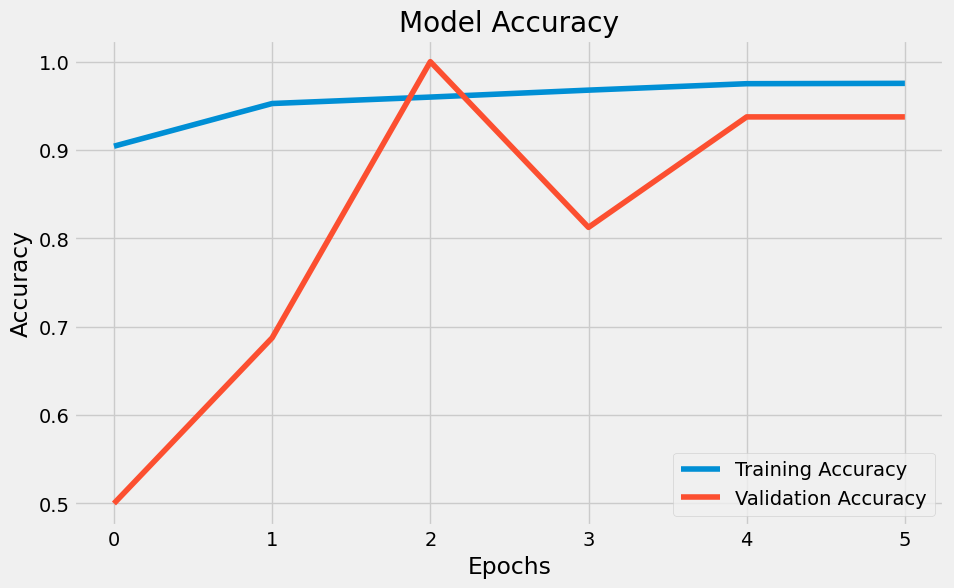

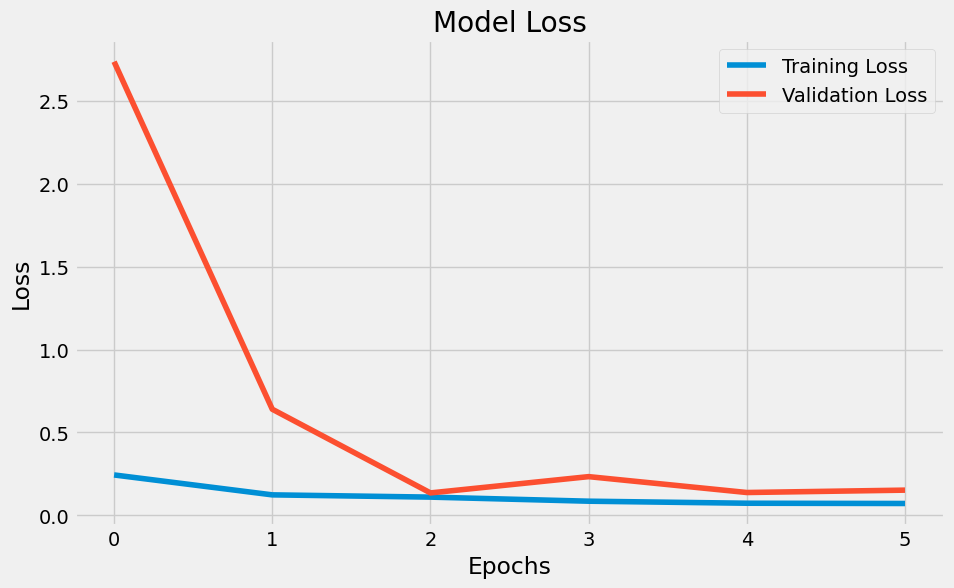

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Precision-Recall and ROC curves
predictions = model.predict(test_images).flatten()
precisions, recalls, thresholds = precision_recall_curve(test_labels, predictions)
fpr, tpr, thresholds_roc = roc_curve(test_labels, predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


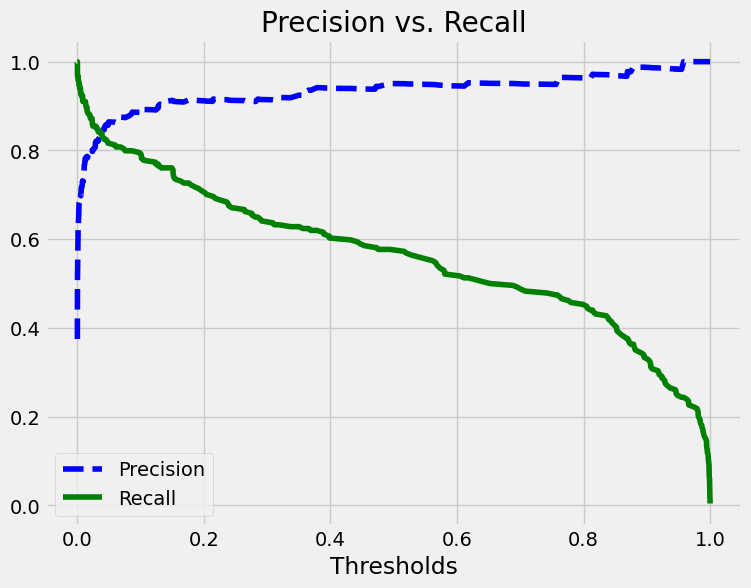

In [ ]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.title('Precision vs. Recall')
plt.xlabel('Thresholds')
plt.legend(loc='best')
plt.show()

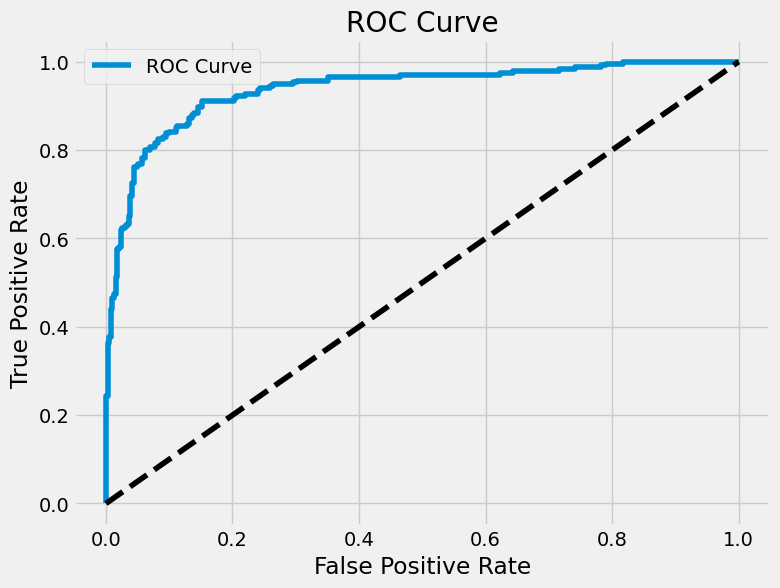

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [ ]:
# Convert probabilities to binary predictions
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

In [ ]:
# Evaluate model on binary predictions
accuracy = accuracy_score(test_labels, binary_predictions)
precision = precision_score(test_labels, binary_predictions)
recall = recall_score(test_labels, binary_predictions)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)

Test Accuracy: 0.8285256410256411
Test Precision: 0.950354609929078
Test Recall: 0.5726495726495726


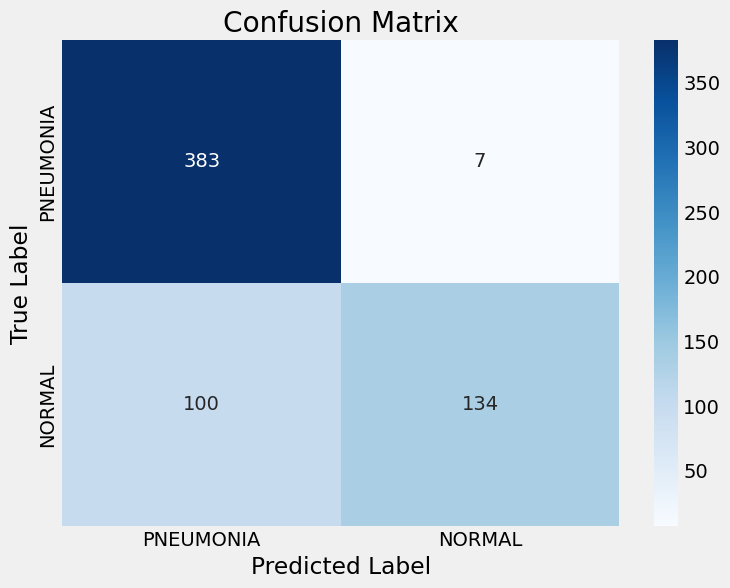

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/pneumonia_detection_model.h5')